<a href="https://colab.research.google.com/github/cij1012/pytorch/blob/master/1228_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch

In [4]:
import torch.autograd
import torch.nn
import torch.optim
import torch.utils.data
import torch.onnx

In [6]:
#2D Tensor
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

(1797, 8, 8)


<function matplotlib.pyplot.show>

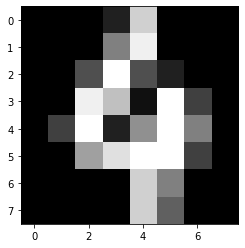

In [7]:
#3D Tensor
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist['images'].shape)
plt.imshow(mnist['images'][100],cmap='gray')
plt.show

In [9]:
t = torch.tensor([0.,1.,2.,3.,4.,5.,6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print(t.dim())
print(t.shape)
print(t.size())

1
torch.Size([7])
torch.Size([7])


In [12]:
m1 = torch.tensor([[3.,3.]])
m2 = torch.tensor([[2.,2.]])

In [13]:
print(m1+m2)

tensor([[5., 5.]])


In [14]:
# Tensor 조작하기
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

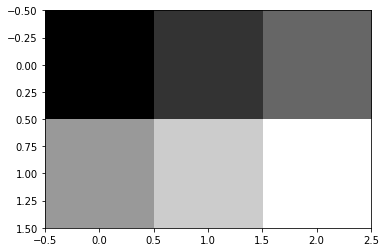

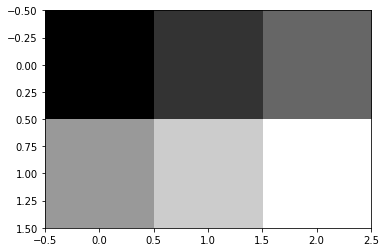

In [15]:
for image in t:
  plt.imshow(image,cmap='gray')
  plt.show()

In [16]:
print(ft.shape)

torch.Size([2, 2, 3])


In [17]:
# view - 원하는 크기의 차원으로 조절
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [20]:
ft.view([-1,6])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [21]:
# 스퀴즈 - 차원이 1인경우 해당차원 제거

ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [22]:
print(ft.squeeze())

tensor([0., 1., 2.])


In [23]:
# 언스퀴즈 - 특정 위치에 1인 차원을 추가
ft = torch.Tensor([0,1,2])
print(ft.shape)

torch.Size([3])


In [24]:
print(ft.unsqueeze(0))

tensor([[0., 1., 2.]])


In [25]:
# dtype

lt = torch.LongTensor([1,2,3,4])
print(lt)

tensor([1, 2, 3, 4])


In [26]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [27]:
bt = torch.ByteTensor([True,False,False,True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [28]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


In [29]:
# Tensor 연결하기 Concatenate

x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6],[7,8]])

In [30]:
print(torch.cat([x,y],dim=0)) # dim=0 -> 행을 기준으로 연결 2*2 - 2*2 -> 4*2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [31]:
print(torch.cat([x,y],dim=1)) # 열을 기준으로 연결 2*4

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [32]:
# 스택킹
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [34]:
print(torch.stack([x,y,z],dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [35]:
# ones_like & zeros_like
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [36]:
print(torch.ones_like(x)) # x와 같은 크기의 1로 이루어진 텐서

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [38]:
print(torch.zeros_like(x)) # x와 같은 크기의 0으로 이루어진 텐서

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [39]:
# 덮어쓰기 연산
x = torch.FloatTensor([[1, 2], [3, 4]])


In [43]:
print(x.mul(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [44]:
print(x.mul_(2.)) # x = x.mul(2) 과 같은 뜻
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [45]:
x

tensor([[2., 4.],
        [6., 8.]])

In [46]:
# 클래스 만들기

result = 0

In [47]:
def add(num):
  global result
  result +=num
  return result

In [48]:
add(3)
add(4)

7

In [49]:
class Calculator:
  def __init__(self):
    self.result = 0
  def add(self, num):
    self.result += num
    return self.result

In [50]:
cal1 = Calculator()

In [51]:
cal2 = Calculator()

In [52]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10
